<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<div style="text-align: center; font-size: 24px;"><b> Problem Statement </b></div>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<div style="margin: 20px; padding: 10px; border-left: 5px solid #2c3e50; background-color: #ecf0f1;">
    <p style="font-size: 16px; text-align: justify; color: #34495e;">
    In the realm of public health, particularly concerning prenatal care and infant health, predicting low birth weight (LBW) emerges as a pivotal challenge with profound implications. The World Health Organization (WHO) identifies low birth weight, defined as a birth weight of less than 2500 grams (approximately 5.5 pounds), as a significant predictor of neonatal mortality and morbidity, as well as long-term health issues into adulthood. Studies have consistently shown that infants with LBW are at a higher risk of early growth retardation, infectious diseases, and developmental challenges, alongside potential chronic conditions later in life such as diabetes and heart disease. Given this backdrop, the ability to predict and, consequently, mitigate the risk factors associated with low birth weight is of paramount importance for healthcare providers, policymakers, and families aiming to ensure the health and well-being of newborns.
    </p>
    <p style="font-size: 16px; text-align: justify; color: #34495e;">
    This assignment engages the intersection of Computational Analytics and Machine Learning to analyze a diverse set of features influencing birth weight. By harnessing predictive modeling techniques, the goal is to identify infants at risk of LBW, thereby enabling early interventions that could significantly enhance health outcomes.
    </p>
</div>


In [1]:
# Standard libraries
import numpy as np  # Mathematical essentials
import pandas as pd  # Data science essentials
import matplotlib.pyplot as plt  # Essential graphical output
import seaborn as sns  # Enhanced graphical output
import scipy.stats as stats  # Statistical functions

# Phi coefficient and logistic regression
import phik
from phik import resources, report
import statsmodels.formula.api as smf  # Logistic Regression
import sklearn.linear_model  # Logistic regression and other linear models

# Preprocessing
from sklearn.preprocessing import power_transform  # Yeo-Johnson transformation
from sklearn.preprocessing import StandardScaler  # Standard scaler

from sklearn.model_selection import train_test_split # train/test split

# Model selection and evaluation
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier   # Decision tree classifier
from sklearn.ensemble import RandomForestClassifier  # Ensemble models
from sklearn.ensemble import GradientBoostingClassifier   # Ensemble models
from sklearn.metrics import (
    accuracy_score, roc_auc_score,  # Model accuracy and area under ROC curve
    confusion_matrix, recall_score, # Confusion matrix and recall score
    precision_score # Precision
)
from sklearn.metrics import make_scorer  # Custom scoring functions
from sklearn.model_selection import RandomizedSearchCV #Hyperparameter tuning

# importing data #
# reading modeling data 
modeling_data = './datasets/birthweight.csv'
df_train = pd.read_csv(filepath_or_buffer = modeling_data,
                         index_col  = 'obs_id')

# reading testing data 
testing_data = './datasets/kaggle_test_data.csv'
df_test = pd.read_csv(filepath_or_buffer  = testing_data,
                        index_col  = 'obs_id')

In [2]:
# concatenating datasets together
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

birth = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)

# checking data
birth.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,set
obs_id,,,,,,,,,,,,,,,,,,,
id_0001,33,12.0,1.0,5.0,31.0,11.0,NaN,NaN,0.0,0.0,1,1,0,0,1,0,0,360.0,Not Kaggle
id_0002,30,14.0,2.0,6.0,31.0,14.0,4.0,6.0,0.0,0.0,0,1,0,0,1,0,0,506.0,Not Kaggle
id_0003,28,14.0,1.0,7.0,29.0,16.0,2.0,5.0,0.0,0.0,0,1,0,0,1,0,0,680.0,Not Kaggle
id_0005,26,NaN,5.0,2.0,21.0,NaN,4.0,7.0,0.0,0.0,1,0,1,0,0,1,0,697.0,Not Kaggle
id_0006,31,16.0,2.0,5.0,32.0,16.0,NaN,NaN,0.0,0.0,1,1,0,0,1,0,0,737.0,Not Kaggle


| Feature Number | Label  | Description                                           |
|:---------------|:-------|:------------------------------------------------------|
| 1              | mage   | mother's age in years                                 |
| 2              | meduc  | mother's education in years                           |
| 3              | monpre | month of pregnancy that prenatal care began           |
| 4              | npvis  | total number of prenatal visits                       |
| 5              | fage   | father's age in years                                 |
| 6              | feduc  | father's education in years                           |
| 7              | omaps  | one minute apgar score                                |
| 8              | fmaps  | five minute apgar score                               |
| 9              | cigs   | average cigarettes per day consumed by the mother     |
| 10             | drink  | average drinks per week consumed by the mother        |
| 11             | male   | 1 if baby male                                        |
| 12             | mwhte  | 1 if mother white                                     |
| 13             | mblck  | 1 if mother black                                     |
| 14             | moth   | 1 if mother is not black or white                     |
| 15             | fwhte  | 1 if father white                                     |
| 16             | fblck  | 1 if father black                                     |
| 17             | foth   | 1 if father is not black or white                     |
| 18             | bwght  | birthweight in grams                                  |


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<div style="text-align: center; font-size: 24px;"><b> Missing Values Analysis & Imputation</b></div>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


In [3]:
# Finding missing values in the dataset
missing_values = birth.isnull().sum().sort_values(ascending = False)
missing_values

bwght     184
drink     115
cigs      110
npvis      68
feduc      47
meduc      30
fage        6
monpre      5
omaps       3
fmaps       3
fwhte       0
foth        0
fblck       0
mage        0
moth        0
mblck       0
mwhte       0
male        0
set         0
dtype: int64

9 features have missing values in the dataset -
drink, cigs, npvis, feduc, meduc, fage, monpre, omaps, fmaps

Out of these - omaps, fmaps are excluded as they are tests performed after the baby is born, thus violating the EVENT HORIZON.

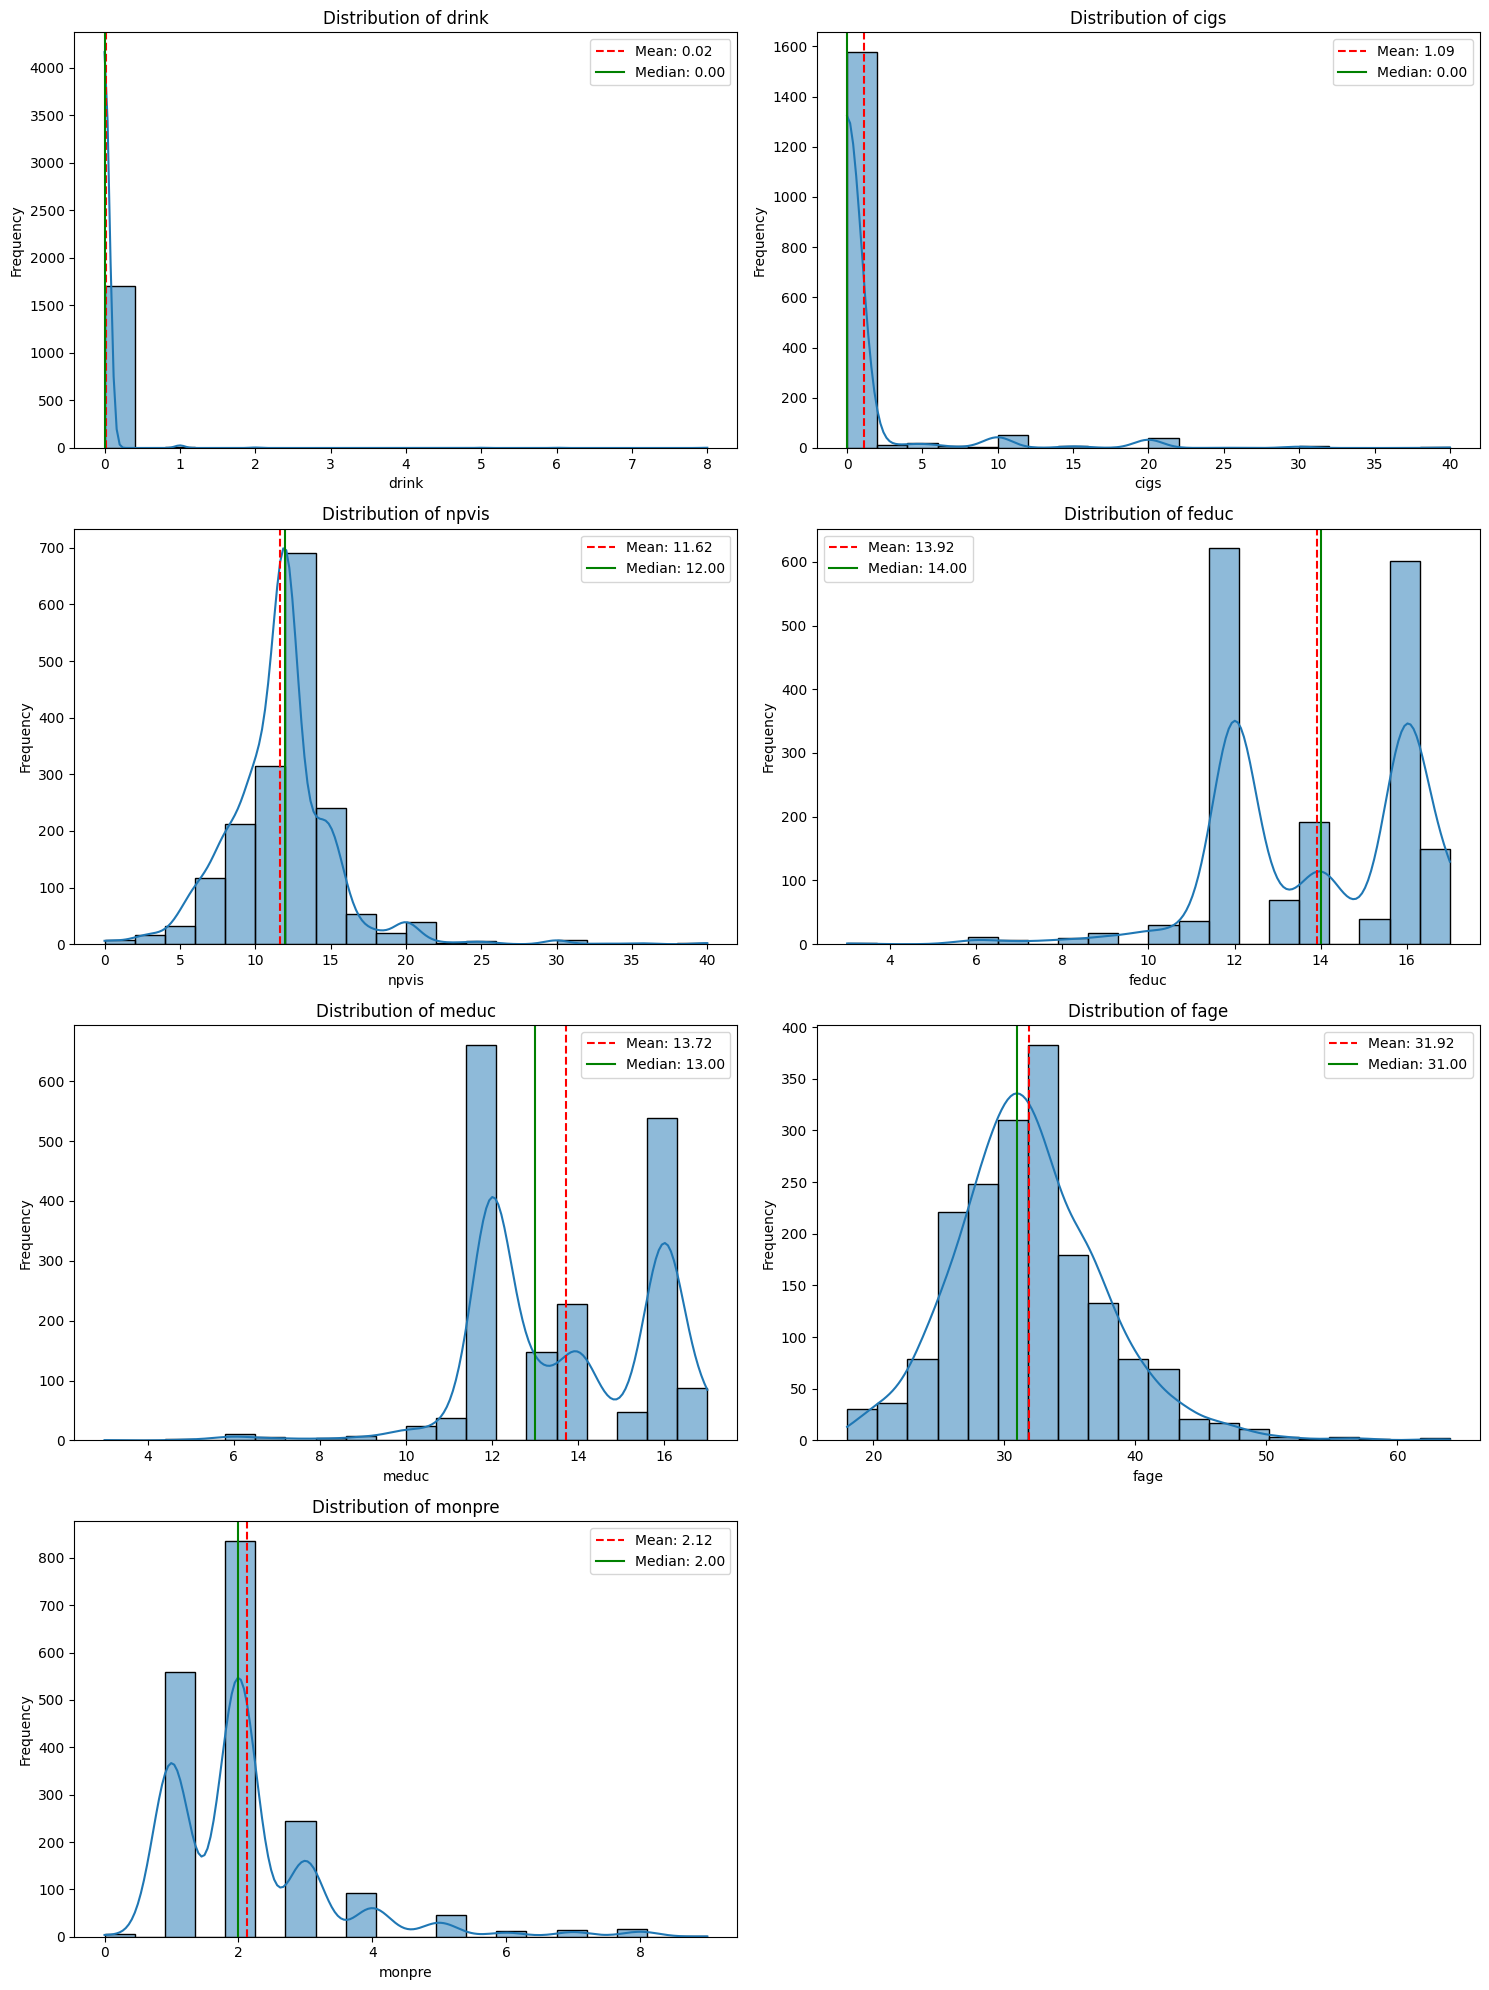

In [4]:
# Plotting features with missing values, excluding omaps, fmaps
features_for_plotting = ['drink', 'cigs', 'npvis', 'feduc', 'meduc', 'fage', 'monpre']

# Subplots 
fig, axs = plt.subplots(4, 2, figsize=(15, 20))  

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterating over each feature to plot
for i, feature in enumerate(features_for_plotting):
    # Plotting the distribution of the feature
    sns.histplot(birth[feature], kde=True, ax=axs[i], bins=20)
    mean = birth[feature].mean()
    median = birth[feature].median()
    
    # Adding mean and median lines
    axs[i].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    axs[i].axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    
    # Setting title and labels
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

# Hide the 8th subplot (bottom right) as we only have 7 features
if len(features_for_plotting) < 8:
    fig.delaxes(axs[-1])

# Adjust layout for better readability
plt.tight_layout()
plt.show()

The series of histograms present a visual interpretation of the distributions for several variables within the dataset, including maternal and paternal education, maternal and paternal age, prenatal care visits, and health behaviors such as smoking and alcohol consumption during pregnancy. The graphs exhibit a skewed distribution for `drink` and `cigs`, with mean hovering near zero for drink and 1 for cigs, suggesting that the majority of mothers reported consuming few cigarettes or alcoholic drinks. This skewness is less pronounced for parental age and education, indicating a more diverse spread of values.

When dealing with missing data, the choice to impute using the median can be attributed to its robustness against skewed distributions. The median, unlike the mean, is not influenced by extreme values, which is particularly advantageous when the data contains outliers or is not symmetrically distributed. This approach ensures that the central tendency used for imputation reflects the typical experience within the population, thus preserving the integrity of the dataset without introducing potential bias that might occur with mean imputation in skewed distributions.

In [5]:
features_missing = ['drink', 'cigs', 'npvis', 'feduc', 'meduc', 'fage', 'monpre']

# Filling missing values with the median of each specified feature
for feature in features_missing:
    median_value = birth[feature].median()
    birth[feature].fillna(median_value, inplace=True)

In [6]:
# dropping post-event horizon features
birth = birth.drop(labels=['omaps', 'fmaps'], axis=1)

# checking results
birth.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink',
       'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght',
       'set'],
      dtype='object')

__Is there an official threshold that signifies when birthweight gets more dangerous?__

The World Health Organization (WHO) has established a clear threshold to classify low birthweight: babies weighing less than 2500 grams (about 5.5 pounds) at birth are considered low birthweight (WHO, 2021). This threshold is internationally recognized and is used to identify newborns at higher risk of experiencing adverse health outcomes. Low birthweight is a significant concern because it is associated with increased vulnerability to infections, delayed development, and possibly higher rates of chronic conditions later in life. This classification aids healthcare providers in implementing immediate care strategies and monitoring to mitigate potential risks associated with low birthweight. 

Moreover, in addition to WHO's guidelines, other credible sources like National Cancer Institute, National Institutes of Health (NIH), UNICEF also stick to this thresold of 2500g for defining low birth weight. 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<div style="text-align: center; font-size: 24px;"><b> Correlation Analysis</b></div>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


__Are there any strong positive or strong negative linear (Pearson) correlations with birthweight?__

In [7]:
# Compute Pearson correlation coefficients with bwght
correlation_bwght = birth.drop(columns=['set']).corr()['bwght'].sort_values(ascending=False).round(decimals = 2)

# Print correlations
print("Pearson Correlation Coefficients with Birthweight:")
correlation_bwght

Pearson Correlation Coefficients with Birthweight:


bwght     1.00
npvis     0.10
fage      0.07
male      0.07
fwhte     0.07
mwhte     0.05
feduc     0.05
meduc     0.04
mage      0.03
monpre   -0.00
drink    -0.02
fblck    -0.02
mblck    -0.02
moth     -0.05
foth     -0.07
cigs     -0.08
Name: bwght, dtype: float64

Based on the Pearson correlation coefficients computed with birthweight (bwght), we can observe both positive and negative correlations, although none of them are considered strong.

__Positive Correlations:__
The variable npvis (number of prenatal visits) and fage (father's age) exhibit weak positive correlations with birthweight, with correlation coefficients of approximately 0.10 and 0.07, respectively. This suggests that higher numbers of prenatal visits and older fathers may be associated with slightly higher birthweights. Similarly, other variables such as male (gender of the baby), fwhte (father's race - white), mwhte (mother's race - white), feduc (father's education), and meduc (mother's education) also show weak positive correlations, albeit with smaller coefficients ranging from 0.07 to 0.05.

__Negative Correlations:__
On the other hand, variables such as cigs (average number of cigarettes smoked per day), foth (father's race - other), moth (mother's race - other), and fblck (father's race - black) demonstrate weak negative correlations with birthweight, ranging from approximately -0.08 to -0.02. This suggests that higher cigarette consumption and certain racial backgrounds (other or black) may be associated with slightly lower birthweights.

Overall, none of the correlations are strong enough to indicate a significant linear relationship with birthweight. However, they provide insights into the potential influences of various factors on birthweight.

In [8]:
# Define low birth weight threshold 
lbw_threshold = 2500

# Creating a new column 'low_bwght' for the classification task
# 1 if 'bwght' is less than 2500 grams (low birth weight)
# 0 if 'bwght' is 2500 grams or more (not low birth weight)
birth['low_bwght'] = (birth['bwght'] <= lbw_threshold).astype(int)

# Calculate the proportion of low birth weight and not low birth weight cases
proportion_low_bwght = birth['low_bwght'].value_counts(normalize=True).round(decimals=2)
proportion_low_bwght

low_bwght
0    0.95
1    0.05
Name: proportion, dtype: float64

In [9]:
# Calculate the actual number of values for low_bwght = 0 and low_bwght = 1
num_low_bwght_0 = (birth['low_bwght'] == 0).sum()
num_low_bwght_1 = (birth['low_bwght'] == 1).sum()

# Print out the counts
print(f"Number of samples with normal birth weight (bwght > {lbw_threshold}g): {num_low_bwght_0}")
print(f"Number of samples with low birth weight (bwght <= {lbw_threshold}g): {num_low_bwght_1}")

Number of samples with normal birth weight (bwght > 2500g): 1747
Number of samples with low birth weight (bwght <= 2500g): 85


Despite the limited number of samples classified as low birth weight (bwght <= 2500g), I'm opting to retain the World Health Organization (WHO) threshold of 2500g to define low birth weight and not increasing its value to get more observations in the low birth weight category. This decision prioritizes accuracy and consistency with international standards, ensuring that healthy babies are not mistakenly classified as low birth weight. While the class imbalance poses a challenge, I'm handling it with class weights during model building, ensuring the development of a reliable predictive model that accurately accounts for birth weight outcomes while mitigating the impact of sample size disparities.

In [10]:
# Defining feature sets for the birth weight dataset
continuous = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink']
non_continuous = ['male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'low_bwght']

# Pearson correlation for continuous features with 'low_bwght'
birth_corr_continuous = birth[continuous + ['low_bwght']].corr(method='pearson').round(decimals=2)

# Calculating phi coefficient for non-continuous features
birth_phi_corr = birth[non_continuous].phik_matrix().round(decimals=2)

# Displaying results
print(f"""
Pearson Correlations with 'low_bwght':
--------------------------------------
{birth_corr_continuous.loc[:, 'low_bwght'].sort_values(ascending=False)}


Phi Coefficients with 'low_bwght':
---------------------------------
{birth_phi_corr.loc[:, 'low_bwght'].sort_values(ascending=False)}
""")

interval columns not set, guessing: ['male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'low_bwght']

Pearson Correlations with 'low_bwght':
--------------------------------------
low_bwght    1.00
cigs         0.04
meduc        0.00
monpre      -0.01
feduc       -0.01
drink       -0.01
mage        -0.02
fage        -0.04
npvis       -0.06
Name: low_bwght, dtype: float64


Phi Coefficients with 'low_bwght':
---------------------------------
low_bwght    1.00
moth         0.01
male         0.00
mwhte        0.00
mblck        0.00
fwhte        0.00
fblck        0.00
foth         0.00
Name: low_bwght, dtype: float64



__After transforming birthweight (bwght) using this threshold, did correlations and/or phi coefficients improve?__

Before the transformation, the Pearson correlation coefficients with birthweight (bwght) revealed several variables with weak correlations, both positive and negative. Notable positive correlations included npvis (total number of prenatal visits) and fage (father's age), while negative correlations were observed with variables such as cigs (average number of cigarettes smoked per day) and foth (father's race - other). However, none of these correlations were considered strong.

After applying the World Health Organization (WHO) threshold of 2500 grams to define low birthweight, the Pearson correlations with 'low_bwght' were recalculated. Interestingly, the correlation with cigs (average number of cigarettes smoked per day) increased slightly, indicating a slightly stronger positive relationship between smoking during pregnancy and low birthweight. Conversely, correlations with other variables remained largely unchanged or showed minimal fluctuations. Similarly, the phi coefficients between 'low_bwght' and demographic variables also remained stable, indicating no significant improvement in the associations between parental characteristics and the occurrence of low birthweight.

Overall, while there were some subtle changes in correlations and phi coefficients after transforming birthweight using the WHO threshold, these changes were minor. The transformations did not lead to significant improvements in the strength of associations between the variables and low birthweight.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<div style="text-align: center; font-size: 24px;"><b> Feature Engineering</b></div>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


One-hot encoding is not required for the features as they appear to be already in a binary format where each racial category is mutually exclusive and represented by individual columns (mwhte, mblck, moth, fwhte, fblck, foth). The dataframe indicates that for each observation, only one of these columns per racial group (mother or father) is marked with a 1, signifying the presence of that category, while all others are marked with a 0. This binary representation inherently reflects one-hot encoding, as it creates a distinct binary variable for each category. 

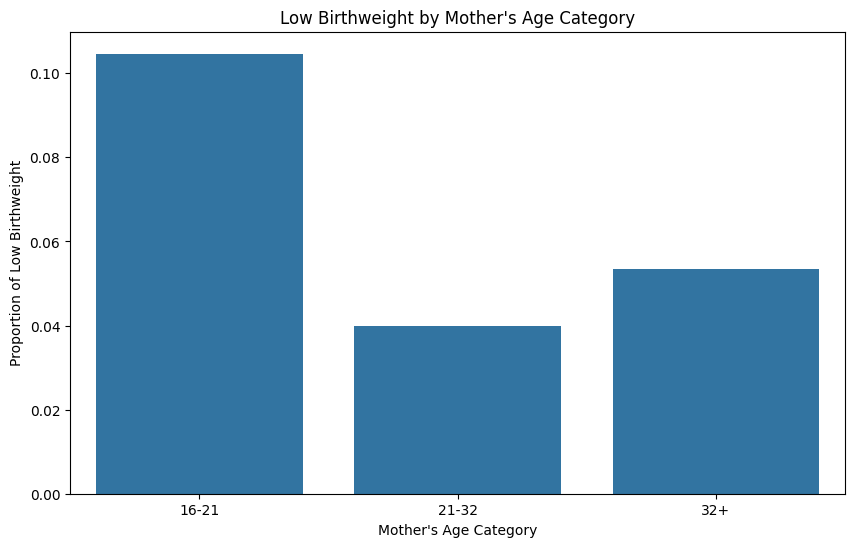

,mage_category,total_count,low_bwght_count,low_bwght_proportion
0,16-21,86,9,10.47
1,21-32,1279,51,3.99
2,32+,467,25,5.35


In [11]:
# Feature 1
# Function to categorize age into bins
def age_category(mage):
    if 16 <= mage <= 21:
        return '16-21'
    elif 21 < mage <= 32:
        return '21-32'
    elif mage > 32:
        return '32+'
    else:
        return 'Other'
    
# Applying the age_category function to categorize mother's age
birth['mage_category'] = birth['mage'].apply(age_category)

# Plotting the categories
age_group_low_bwth_mean = birth.groupby('mage_category')['low_bwght'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='mage_category', y='low_bwght', data=age_group_low_bwth_mean, order=['16-21', '21-32', '32+'])
plt.title('Low Birthweight by Mother\'s Age Category')
plt.xlabel('Mother\'s Age Category')
plt.ylabel('Proportion of Low Birthweight')
plt.show()
# Group by 'mage_category' and count the total entries and the number of low birthweight cases
age_group_stats = birth.groupby('mage_category').agg(
    total_count=pd.NamedAgg(column='low_bwght', aggfunc='size'),
    low_bwght_count=pd.NamedAgg(column='low_bwght', aggfunc='sum')
).reset_index()

# Calculate the proportion of low birthweight in each age group
age_group_stats['low_bwght_proportion'] = (age_group_stats['low_bwght_count'] / age_group_stats['total_count'] * 100).round(decimals = 2)
age_group_stats

For the youngest mothers, between 16-21 years, the data reveals a heightened LBW incidence at 10.47%, implying additional risks during the formative stages of pregnancy within this demographic. As maternal age increases to the 21-32 range, the LBW proportion dips significantly to 3.99%, suggesting a period of decreased vulnerability. Mothers aged 32 and above see a slight uptick in LBW rates to 5.35%, which could be indicative of the nuanced biological changes accompanying later maternal age.

To back it up, it's pertinent to reference the World Health Organization, which acknowledges that both younger and older maternal ages are associated with a higher risk of adverse pregnancy outcomes (WHO, 2021). Furthermore, the American College of Obstetricians and Gynecologists corroborates that adolescent pregnancies can be fraught with higher rates of obstetric complications, while pregnancies at an advanced maternal age may confront increased biological challenges [ACOG, 2013]. These findings echo the data's story, affirming the critical window of 21-32 years as potentially optimal for childbearing in terms of LBW risk.

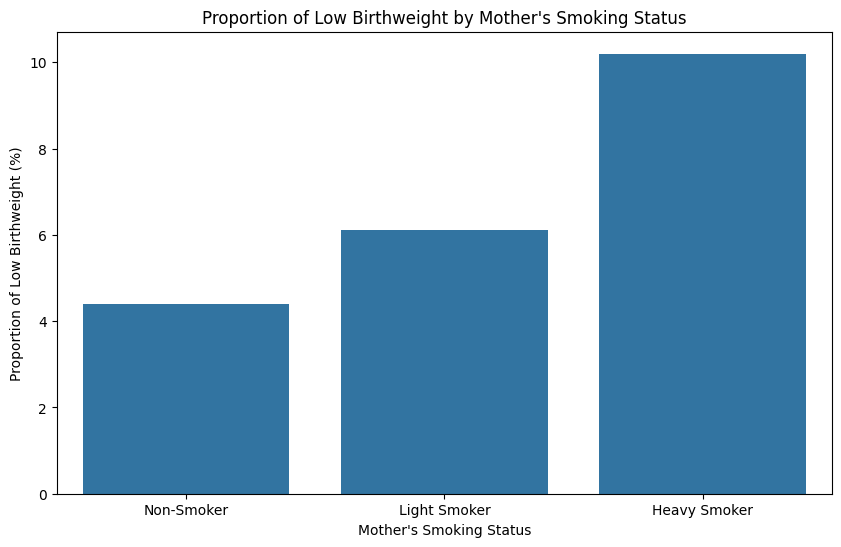

,smoking_status,total_count,low_bwght_count,low_bwght_proportion
0,Heavy Smoker,49,5,10.20
1,Light Smoker,98,6,6.12
2,Non-Smoker,1685,74,4.39


In [12]:
# Feature 2
# Function to categorize smoking status
def smoking_status_category(cigs):
    if cigs == 0:
        return 'Non-Smoker'
    elif 1 <= cigs <= 15:
        return 'Light Smoker'
    elif cigs > 15:
        return 'Heavy Smoker'
    else:
        return 'Unknown'

# Applying the smoking_status_category function to categorize smoking status
birth['smoking_status'] = birth['cigs'].apply(smoking_status_category)

# Grouping by 'smoking_status' to get the total count and count of low birthweight cases
cigs_stats = birth.groupby('smoking_status').agg(
    total_count=pd.NamedAgg(column='low_bwght', aggfunc='size'),
    low_bwght_count=pd.NamedAgg(column='low_bwght', aggfunc='sum')
).reset_index()

# Calculating the proportion of low birthweight in each smoking category
cigs_stats['low_bwght_proportion'] = (cigs_stats['low_bwght_count'] / cigs_stats['total_count'] * 100).round(2)

# Reordering the categories for plotting
cigs_stats['smoking_status'] = pd.Categorical(cigs_stats['smoking_status'], 
                                               categories=['Non-Smoker', 'Light Smoker', 'Heavy Smoker'],
                                               ordered=True)

# Plotting the bar graph with the categories in the desired order
plt.figure(figsize=(10, 6))
sns.barplot(x='smoking_status', y='low_bwght_proportion', data=cigs_stats, order=['Non-Smoker', 'Light Smoker', 'Heavy Smoker'])
plt.title('Proportion of Low Birthweight by Mother\'s Smoking Status')
plt.xlabel('Mother\'s Smoking Status')
plt.ylabel('Proportion of Low Birthweight (%)')
plt.show()

# Display the stats table
cigs_stats

Non-smokers depict the lowest LBW proportion at 4.39%, a testament to the broader health benefits of abstaining from tobacco. The landscape shifts with light smokers, where LBW cases ascend to 6.12%, further escalating to 10.20% among heavy smokers. This gradient not only quantifies the impact of maternal smoking on birthweight but also mirrors the dose-dependent relationship between tobacco exposure and adverse pregnancy outcomes.

The narrative painted by the data resonates with findings from medical research, emphasizing the detrimental effects of smoking during pregnancy. According to the Centers for Disease Control and Prevention (CDC), smoking during pregnancy increases the risk of LBW, which can lead to developmental delays and health problems for the infant [CDC, 2020].

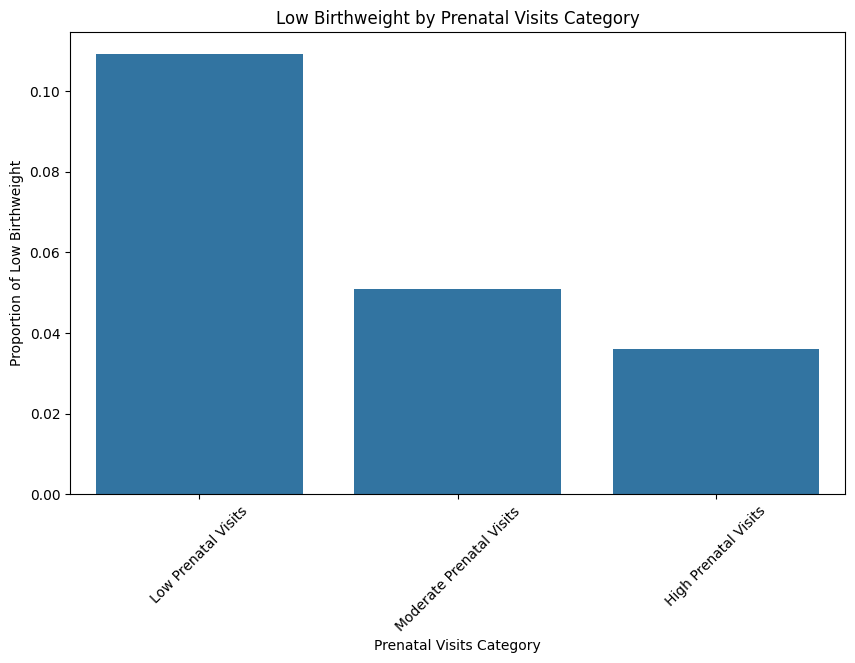

,npvis_category,total_count,low_bwght_count,low_bwght_proportion
0,High Prenatal Visits,1246,45,3.61
1,Low Prenatal Visits,174,19,10.92
2,Moderate Prenatal Visits,412,21,5.10


In [13]:
# Feature 3
# Define bins for prenatal visits
bins = [-1, 7, 10, 40]
labels = ['Low Prenatal Visits', 'Moderate Prenatal Visits', 'High Prenatal Visits']

# Categorize 'npvis' into the bins
birth['npvis_category'] = pd.cut(birth['npvis'], bins=bins, labels=labels).astype(str)

# Group by 'npvis_category' and calculate the mean 'low_bwght'
npvis_low_bwth_mean = birth.groupby('npvis_category')['low_bwght'].mean().reset_index()
npvis_low_bwth_mean = npvis_low_bwth_mean.sort_values('low_bwght', ascending=False)

# Visualize the proportion of low birth weight by prenatal visits category
plt.figure(figsize=(10, 6))
sns.barplot(x='npvis_category', y='low_bwght', data=npvis_low_bwth_mean, order=npvis_low_bwth_mean['npvis_category'])
plt.title('Low Birthweight by Prenatal Visits Category')
plt.xlabel('Prenatal Visits Category')
plt.ylabel('Proportion of Low Birthweight')
plt.xticks(rotation=45)
plt.show()

# Group by 'npvis_category' to get the total count and count of low birthweight cases
npvis_stats = birth.groupby('npvis_category').agg(
    total_count=pd.NamedAgg(column='low_bwght', aggfunc='size'),
    low_bwght_count=pd.NamedAgg(column='low_bwght', aggfunc='sum')
).reset_index()

# Calculating the proportion of low birthweight in each prenatal visits category
npvis_stats['low_bwght_proportion'] = (npvis_stats['low_bwght_count'] / npvis_stats['total_count'] * 100).round(2)

# Display the counts and proportions table
npvis_stats

The visual data underscores the correlation between the frequency of prenatal visits and low birthweight (LBW) occurrences. With a clear differential in LBW proportions across categories, a mere 3.61% in the 'High Prenatal Visits' group stands in stark contrast to the 'Low Prenatal Visits' group, which sees a proportion surge to 10.92%. 'Moderate Prenatal Visits' assumes a middle ground at 5.10%. This suggests that higher engagement in prenatal care is potentially effective in mitigating LBW risks, an inference that resonates with the crucial role of prenatal visits in early detection and timely intervention for risk factors associated with LBW.

Moreover, The American Pregnancy Association accentuates the role of frequent prenatal visits in monitoring the development of the fetus and managing health conditions that could lead to complications like LBW [American Pregnancy Association, 2021]. Additionally, a report by the World Health Organization reaffirms that adequate prenatal care can significantly contribute to the reduction of perinatal mortality and morbidity, including LBW [World Health Organization, 2021].

In [14]:
# Feature 4
# Adjusted conditions for creating the 'parents_race' column without the 'Other' category
conditions = [
    (birth['mblck'] == 1) & (birth['fblck'] == 1),  # Black Parents
    (birth['mwhte'] == 1) & (birth['fwhte'] == 1),  # White Parents
    ((birth['mblck'] == 1) & (birth['fwhte'] == 1)) | ((birth['mwhte'] == 1) & (birth['fblck'] == 1)),  # Mixed Parents
    (birth['moth'] == 1) & (birth['foth'] == 1)  # Neither father/mother black or white
]

# Corresponding labels for each condition
values = [
    'Black Parents',
    'White Parents',
    'Mixed Parents',
    'Neither father/mother black or white'
]

# Apply conditions and values to the DataFrame
birth['parents_race'] = np.select(conditions, values, 'Other')

# Recalculate and display the counts and proportions table
parents_race_stats = birth.groupby('parents_race').agg(
    total_count=pd.NamedAgg(column='low_bwght', aggfunc='size'),
    low_bwght_count=pd.NamedAgg(column='low_bwght', aggfunc='sum')
).reset_index()

parents_race_stats['low_bwght_proportion'] = (
    parents_race_stats['low_bwght_count'] / parents_race_stats['total_count'] * 100
).round(2)

# Display the counts and proportions table
parents_race_stats

,parents_race,total_count,low_bwght_count,low_bwght_proportion
0,Black Parents,97,5,5.15
1,Mixed Parents,16,0,0.00
2,Neither father/mother black or white,82,2,2.44
3,Other,30,1,3.33
4,White Parents,1607,77,4.79


The feature offers a snapshot of how parental racial identity correlates with the prevalence of low birthweight (LBW) in newborns. Among babies with parents identified as Black, the LBW proportion stands at 5.15%, marginally higher than the proportion of 4.79% seen in White parents. Interestingly, mixed-race parents and those not identified as either Black or White exhibit notably lower proportions, with mixed parents observing no instances of LBW and the 'Neither' category reporting a 2.44% occurrence.

Numerous studies have documented disparities in birthweight across racial and ethnic groups, with Black parents experiencing disproportionately higher rates of LBW compared to White parents. For instance, a study published in the Journal of Racial and Ethnic Health Disparities found that Black women are more likely to have LBW infants compared to White women, attributing this difference to systemic racial inequalities and socioeconomic factors (Bryant et al., 2019). Additionally, research conducted by the Centers for Disease Control and Prevention (CDC) underscores the role of racial discrimination and structural racism in contributing to adverse birth outcomes among Black populations, including LBW (CDC, 2021). 

/var/folders/14/qj0yrj614hs4bbw83ghhpls80000gn/T/ipykernel_4204/3454813734.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_diff_category', y='low_bwght_proportion', data=age_diff_stats, palette='coolwarm')


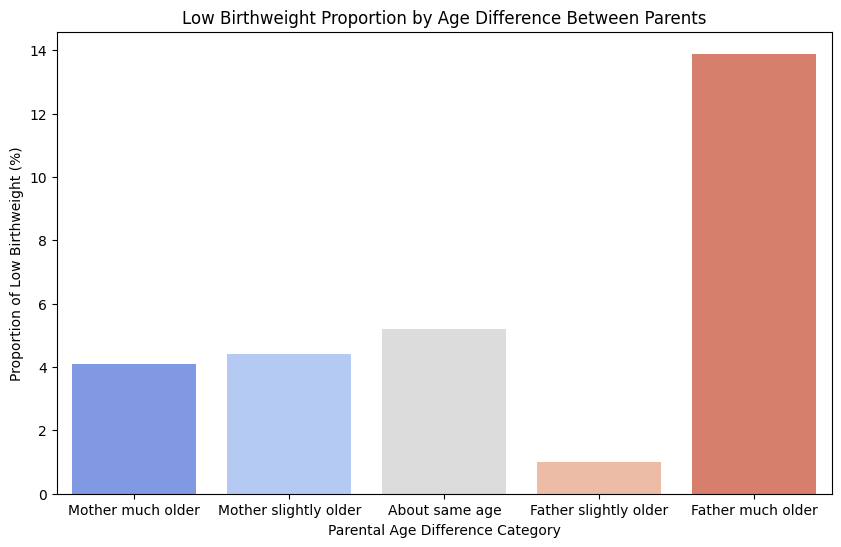

,age_diff_category,total_count,low_bwght_count,low_bwght_proportion
0,Mother much older,416,17,4.09
1,Mother slightly older,589,26,4.41
2,About same age,692,36,5.20
3,Father slightly older,99,1,1.01
4,Father much older,36,5,13.89


In [15]:
# Feature 5
# Define bins for age differences
age_diff_bins = [-np.inf, -5, -2, 2, 5, np.inf]
age_diff_labels = ['Mother much older', 'Mother slightly older', 'About same age', 'Father slightly older', 'Father much older']

# Create the 'age_diff' feature
birth['age_diff'] = birth['mage'] - birth['fage']

# Bin the age differences
birth['age_diff_category'] = pd.cut(birth['age_diff'], bins=age_diff_bins, labels=age_diff_labels)

# Group by 'age_diff_category' to get the total count and count of low birthweight cases
age_diff_stats = birth.groupby('age_diff_category').agg(
    total_count=pd.NamedAgg(column='low_bwght', aggfunc='size'),
    low_bwght_count=pd.NamedAgg(column='low_bwght', aggfunc='sum')
).reset_index()

# Calculate the proportion of low birthweight in each category
age_diff_stats['low_bwght_proportion'] = (age_diff_stats['low_bwght_count'] / age_diff_stats['total_count'] * 100).round(2)

plt.figure(figsize=(10, 6))
sns.barplot(x='age_diff_category', y='low_bwght_proportion', data=age_diff_stats, palette='coolwarm')
plt.title('Low Birthweight Proportion by Age Difference Between Parents')
plt.xlabel('Parental Age Difference Category')
plt.ylabel('Proportion of Low Birthweight (%)')
plt.show()

# Stats table
age_diff_stats = birth.groupby('age_diff_category').agg(
    total_count=pd.NamedAgg(column='low_bwght', aggfunc='size'),
    low_bwght_count=pd.NamedAgg(column='low_bwght', aggfunc='sum')
).reset_index()
age_diff_stats['low_bwght_proportion'] = (age_diff_stats['low_bwght_count'] / age_diff_stats['total_count'] * 100).round(2)
age_diff_stats

The bar chart provides valuable insights into the correlation between the age gap of parents and the prevalence of low birthweight (LBW) among their offspring. The data reveals a discernible pattern: as the age difference between parents widens, the likelihood of LBW increases significantly. Specifically, when mothers are either much older or slightly older than fathers, the LBW proportions remain relatively moderate at 4.09% and 4.41%, respectively. However, as paternal age advances, especially when fathers are considerably older, the LBW proportion escalates dramatically to 13.89%. This notable disparity underscores the substantial impact of paternal age on birth outcomes, emphasizing the heightened risk of LBW associated with a significant difference in parental age.

This observation is consistent with findings from scientific studies examining the influence of parental age on birth outcomes. Research published in the British Medical Journal (BMJ) indicates that advanced paternal age and having significant differences in their age is associated with an increased risk of adverse birth outcomes, including LBW, possibly due to genetic mutations and alterations in sperm quality (BMJ, 2019). Furthermore, a study conducted by the  Journal of Epidemiology & Community Health underscores the importance of considering both maternal and paternal age in prenatal care, as high paternal age difference has been linked to a higher incidence of LBW and other complications during pregnancy (Journal of Epidemiology & Community Health, 2020). 

/var/folders/14/qj0yrj614hs4bbw83ghhpls80000gn/T/ipykernel_4204/1628172001.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='socio_economic_status', y='low_bwght_proportion', data=ses_stats, palette='Set2')


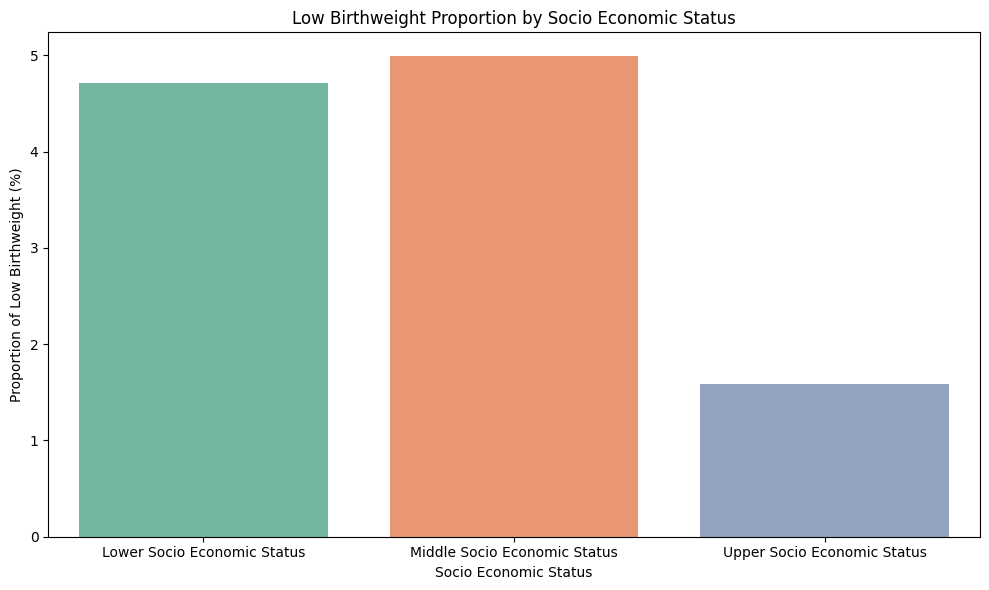

,socio_economic_status,total_count,low_bwght_count,low_bwght_proportion
0,Lower Socio Economic Status,764,36,4.71
1,Middle Socio Economic Status,942,47,4.99
2,Upper Socio Economic Status,126,2,1.59


In [16]:
# Feature 6
# Calculate the average education level between mother and father
birth['avg_education'] = (birth['meduc'] + birth['feduc']) / 2

# Socio Economic Status categories
def classify_ses(avg_education):
    if avg_education <= 13:
        return 'Lower Socio Economic Status'
    elif (avg_education > 13) and (avg_education <= 16):
        return 'Middle Socio Economic Status'
    else:
        return 'Upper Socio Economic Status'

# Classify families into SES classes
birth['socio_economic_status'] = birth['avg_education'].apply(classify_ses)

# Now, grouping by the corrected 'socio_economic_status'
ses_stats = birth.groupby('socio_economic_status').agg(
    total_count=pd.NamedAgg(column='low_bwght', aggfunc='size'),
    low_bwght_count=pd.NamedAgg(column='low_bwght', aggfunc='sum')
).reset_index()

# Calculate the proportion of low birthweight
ses_stats['low_bwght_proportion'] = (ses_stats['low_bwght_count'] / ses_stats['total_count'] * 100).round(2)
    
# Create a visualization for the socio-economic status categories
plt.figure(figsize=(10, 6))
sns.barplot(x='socio_economic_status', y='low_bwght_proportion', data=ses_stats, palette='Set2')
plt.title('Low Birthweight Proportion by Socio Economic Status')
plt.xlabel('Socio Economic Status')
plt.ylabel('Proportion of Low Birthweight (%)')
plt.tight_layout()
plt.show()

# Display the stats table
ses_stats

The bar chart offers a striking visual representation of the interplay between socio-economic status (SES) and the proportion of low birthweight (LBW) in newborns. Observing the data, it's apparent that as SES rises, the proportion of LBW notably decreases—from 4.71% in the lower SES bracket to 1.59% among the upper SES. This inverse relationship underscores how SES, a proxy for a range of factors including access to healthcare, nutrition, and education, can impact neonatal health.

Moreover, a review by "American Journal of Public Health" highlights that socio-economic disparities contribute significantly to the risk of LBW and other adverse neonatal outcomes. These disparities are often mediated by factors such as maternal health, access to prenatal care, nutritional status, and exposure to environmental toxins (American Journal of Public Health, 2016). Also, as per an article published New York University highlighting the work of Conley and Bennett (2000) in the "Sociological Forum" elaborates on how SES affects maternal stress levels, which in turn can impact fetal development and lead to LBW. 

__Which two features in your machine learning model had the largest impact on birthweight?__

The Random Forest feature importance graph suggests that __prenatal visits__ and __socio-economic status__ are the 2 most influential factors in predicting low birthweight (LBW) amongst the 6 engineered features above.

The prominence of prenatal visits aligns with extensive public health research indicating that regular and early prenatal care significantly reduces the risk of LBW. Regular check-ups allow for the monitoring of fetal development and the early detection and management of potential complications. For healthcare providers and policymakers, this emphasizes the importance of accessible prenatal care programs and education on prenatal health, especially for high-risk populations. Ensuring that pregnant mothers are informed about the significance of prenatal visits and can access these services could potentially reduce LBW rates.

Socio-economic status (SES) appears to be another critical feature, which is not surprising, given that SES encompasses a range of factors including education, income, and access to resources — all of which impact health outcomes. A higher SES often equates to better access to nutritious food, healthcare, and health education, which contributes to healthier pregnancy outcomes. One actionable insight is to advocate for policies that address socio-economic disparities, such as improving access to quality healthcare for lower-income families and creating targeted interventions in communities with lower SES to improve overall infant health outcomes. 

Also, it's no surprise to me that prenatal visits and socio-economic status emerged as the top 2 determinants of birthweight, as they are intrinsically linked aspects of health care accessibility and quality. Access to and utilization of prenatal care services are often contingent upon one's socio-economic position, with those in higher socio-economic brackets more likely to attend regular prenatal appointments.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<div style="text-align: center; font-size: 24px;"><b> Transformations</b></div>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


In [17]:
#Standard Scaler
def standard_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """
    
    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)

    # FITTING the scaler with the data
    scaler.fit(df)

    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)
    
    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df

In [18]:
# Subsetting X-data to exclude 'bwght', 'set', and 'low_bwght' columns
x_data = birth.drop(['bwght', 'set', 'low_bwght'], axis=1)

# Identifying numeric and categorical features
numeric_features = x_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_data.select_dtypes(include=['object', 'category']).columns

# Calculating skewness for numeric features only
numeric_x_data = x_data[numeric_features]
feature_skewness = numeric_x_data.skew().round(decimals=2)
feature_skewness

mage              0.07
meduc            -0.36
monpre            2.07
npvis             1.49
fage              0.66
feduc            -0.56
cigs              4.80
drink            21.76
male             -0.05
mwhte            -2.44
mblck             3.73
moth              3.95
fwhte            -2.49
fblck             3.77
foth              4.05
age_diff         -0.90
avg_education    -0.53
dtype: float64

In [19]:
# Applying the Yeo-Johnson transformation and standardizing numeric features
numeric_x_transformed = power_transform(numeric_x_data, method='yeo-johnson')
numeric_x_transformed_df = pd.DataFrame(numeric_x_transformed, columns=numeric_x_data.columns)
numeric_x_transformed_df.skew().round(decimals = 2)

mage             -0.00
meduc            -0.03
monpre           -0.02
npvis             0.29
fage              0.00
feduc            -0.11
cigs              3.09
drink            10.57
male             -0.05
mwhte            -2.44
mblck             3.73
moth              3.95
fwhte            -2.49
fblck             3.77
foth              4.05
age_diff         -0.17
avg_education    -0.05
dtype: float64

__NOTE:__ The Yeo-Johnson transformation method has handled skewness only for continuous features and not categorical features. 

In [20]:
# Aligning the index with the original x_data dataframe
numeric_x_transformed_df.index = x_data.index

In [21]:
# Encoding categorical features
categorical_x_data = x_data[categorical_features].astype(str)  # Ensure all categorical data are string type for encoding
categorical_x_encoded = pd.get_dummies(categorical_x_data)

# Combining transformed numeric data with encoded categorical data
x_data_prepared = pd.concat([numeric_x_transformed_df, categorical_x_encoded], axis=1)

In [22]:
# standardizing X-data (st = scaled and transformed)
x_data_st = standard_scaler(df = x_data_prepared)

# checking results
x_data_st.describe(include = 'number').round(decimals = 2)

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,...,parents_race_Other,parents_race_White Parents,age_diff_category_About same age,age_diff_category_Father much older,age_diff_category_Father slightly older,age_diff_category_Mother much older,age_diff_category_Mother slightly older,socio_economic_status_Lower Socio Economic Status,socio_economic_status_Middle Socio Economic Status,socio_economic_status_Upper Socio Economic Status
count,1832.00,1832.00,1832.00,1832.00,1832.00,1832.00,1832.00,1832.00,1832.00,1832.00,...,1832.00,1832.00,1832.00,1832.00,1832.00,1832.00,1832.00,1832.00,1832.00,1832.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.96,-3.77,-4.58,-4.49,-3.05,-3.04,-0.30,-0.09,-1.03,-2.79,...,-0.13,-2.67,-0.78,-0.14,-0.24,-0.54,-0.69,-0.85,-1.03,-0.27
25%,-0.74,-0.85,-1.23,-0.41,-0.66,-0.92,-0.30,-0.09,-1.03,0.36,...,-0.13,0.37,-0.78,-0.14,-0.24,-0.54,-0.69,-0.85,-1.03,-0.27
50%,-0.10,-0.39,0.17,0.16,-0.09,-0.06,-0.30,-0.09,0.97,0.36,...,-0.13,0.37,-0.78,-0.14,-0.24,-0.54,-0.69,-0.85,0.97,-0.27
75%,0.73,1.13,0.17,0.16,0.60,0.96,-0.30,-0.09,0.97,0.36,...,-0.13,0.37,1.28,-0.14,-0.24,-0.54,1.45,1.18,0.97,-0.27
max,2.93,1.69,2.76,6.16,4.17,1.53,3.39,10.65,0.97,0.36,...,7.75,0.37,1.28,7.06,4.18,1.84,1.45,1.18,0.97,3.68


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<div style="text-align: center; font-size: 24px;"><b> Base Modeling</b></div>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


In [23]:
# Declaring Explanatory variables (Standardized Form)
birth_data   = x_data_st

In [24]:
# Align birth_data's index with birth's index before concatenation
birth_data.index = birth.index

In [25]:
# Preparing dataset for model builiding
birth_prep = pd.concat(objs=[birth[["low_bwght", "set"]], birth_data], axis=1)

In [26]:
# Rename columns in the DataFrame
birth_prep.rename(columns={
    'mage_category_16-21': 'mage_category_16_to_21',
    'mage_category_21-32': 'mage_category_21_to_32',
    'mage_category_32+': 'mage_category_32_plus',
    'smoking_status_Heavy Smoker': 'smoking_status_Heavy_Smoker',
    'smoking_status_Light Smoker': 'smoking_status_Light_Smoker',
    'smoking_status_Non_Smoker': 'smoking_status_Non_Smoker',
    'npvis_category_High Prenatal Visits': 'npvis_category_High_Prenatal_Visits',
    'npvis_category_Low Prenatal Visits': 'npvis_category_Low_Prenatal_Visits',
    'npvis_category_Moderate Prenatal Visits': 'npvis_category_Moderate_Prenatal_Visits',
    'parents_race_Black Parents' : 'parents_race_Black_Parents',
    'parents_race_Mixed Parents' : 'parents_race_Mixed_Parents',
    'parents_race_Neither father/mother black or white' : 'parents_race_Neither_father_mother_black_or_white',
    'parents_race_White Parents' : 'parents_race_White_Parents',
     'age_diff_category_About same age' : 'age_diff_category_About_same_age',                 
     'age_diff_category_Father much older' : 'age_diff_category_Father_much_older',              
     'age_diff_category_Father slightly older' : 'age_diff_category_Father_slightly_older',            
     'age_diff_category_Mother much older' : 'age_diff_category_Mother_much_older',               
    'age_diff_category_Mother slightly older' : 'age_diff_category_Mother_slightly_older',
    'socio_economic_status_Lower Socio Economic Status': 'socio_economic_status_Lower_Socio_Economic_Status',
    'socio_economic_status_Middle Socio Economic Status': 'socio_economic_status_Middle_Socio_Economic_Status',
    'socio_economic_status_Upper Socio Economic Status': 'socio_economic_status_Upper_Socio_Economic_Status',
    'smoking_status_Non-Smoker' : 'smoking_status_Non_Smoker'
}, inplace=True)

In [27]:
# Parsing out testing data #

# dataset for kaggle
kaggle_data = birth_prep[ birth_prep['set'] == 'Kaggle' ].copy()

# dataset for model building
birth = birth_prep[ birth_prep['set'] == 'Not Kaggle' ].copy()

# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)

# dropping set identifier (model building)
birth.drop(labels = 'set',
        axis = 1,
        inplace = True)

In [28]:
# instantiating a logistic regression model object
model_formula = """ low_bwght ~   mage_category_21_to_32 + 
                                  mage_category_32_plus + 
                                  smoking_status_Light_Smoker + 
                                  smoking_status_Non_Smoker + 
                                  npvis_category_High_Prenatal_Visits + 
                                  npvis_category_Low_Prenatal_Visits + 
                                  age_diff_category_About_same_age + 
                                  age_diff_category_Father_slightly_older + 
                                  age_diff_category_Mother_much_older + 
                                  age_diff_category_Mother_slightly_older + 
                                  socio_economic_status_Lower_Socio_Economic_Status + 
                                  socio_economic_status_Upper_Socio_Economic_Status  
                                  """
logit_full = smf.logit(formula=model_formula, data=birth).fit()

# checking the results SUMMARY
logit_full.summary2()

Optimization terminated successfully.
         Current function value: 0.192082
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                          Results: Logit
==================================================================================================
Model:                         Logit                       Method:                      MLE       
Dependent Variable:            low_bwght                   Pseudo R-squared:            0.054     
Date:                          2024-03-10 17:05            AIC:                         659.1025  
No. Observations:              1648                        BIC:                         729.3976  
Df Model:                      12                          Log-Likelihood:              -316.55   
Df Residuals:                  1635                        LL-Null:                     -334.77   
Converged:                     1.0000                      LLR p-value:                 0.00027631
No. Iterations:                8.0000                      Scale:                       1.0000    
--------------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------------------
Intercept                                         -3.1169   0.1346 -23.1532 0.0000 -3.3808 -2.8531
mage_category_21_to_32                            -0.3925   0.1840  -2.1333 0.0329 -0.7531 -0.0319
mage_category_32_plus                             -0.2089   0.1950  -1.0711 0.2841 -0.5911  0.1734
smoking_status_Light_Smoker                       -0.0999   0.1482  -0.6741 0.5002 -0.3903  0.1905
smoking_status_Non_Smoker                         -0.1883   0.1425  -1.3219 0.1862 -0.4676  0.0909
npvis_category_High_Prenatal_Visits               -0.1246   0.1300  -0.9582 0.3380 -0.3795  0.1303
npvis_category_Low_Prenatal_Visits                 0.2633   0.1003   2.6261 0.0086  0.0668  0.4599
age_diff_category_About_same_age                  -0.5132   0.2646  -1.9394 0.0525 -1.0319  0.0054
age_diff_category_Father_slightly_older           -0.6539   0.2553  -2.5609 0.0104 -1.1544 -0.1534
age_diff_category_Mother_much_older               -0.5526   0.2420  -2.2837 0.0224 -1.0268 -0.0783
age_diff_category_Mother_slightly_older           -0.6059   0.2616  -2.3161 0.0206 -1.1186 -0.0932
socio_economic_status_Lower_Socio_Economic_Status -0.1580   0.1246  -1.2677 0.2049 -0.4022  0.0863
socio_economic_status_Upper_Socio_Economic_Status -0.3404   0.1860  -1.8300 0.0673 -0.7051  0.0242
==================================================================================================

"""

__Note:__ p-values significance (<0.05) hasn't been strictly taken into consideration and some engineered features in the base model are exceeding this threshold. However, I decided to keep them because during EDA these features have shown meaningful patterns with low birth weight.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<div style="text-align: center; font-size: 24px;"><b> Candidate Model Development</b></div>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


In [29]:
# choosing the x-variables

# Extracting the part of the formula after '~'
feature_part = model_formula.split('~')[1]

x_features = [feature.strip() for feature in feature_part.split('+')]
x_features

['mage_category_21_to_32',
 'mage_category_32_plus',
 'smoking_status_Light_Smoker',
 'smoking_status_Non_Smoker',
 'npvis_category_High_Prenatal_Visits',
 'npvis_category_Low_Prenatal_Visits',
 'age_diff_category_About_same_age',
 'age_diff_category_Father_slightly_older',
 'age_diff_category_Mother_much_older',
 'age_diff_category_Mother_slightly_older',
 'socio_economic_status_Lower_Socio_Economic_Status',
 'socio_economic_status_Upper_Socio_Economic_Status']

In [30]:
# Setting the target variable
y_variable = 'low_bwght'

In [31]:
# Train-Test Split

# prepping data for train-test split
y_data = birth[y_variable]

# removing non-numeric columns and missing values
x_data = birth[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)

# storing remaining x_features after the step above
x_features = list(x_data.columns)

# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify = y_data)

# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {birth.shape[0]}
Features  (Columns): {birth.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 1648
Features  (Columns): 40


Training Data (X-side)
----------------------
Observations (Rows): 1236
Features  (Columns): 12


Training Data (y-side)
----------------------
Feature Name:        low_bwght
Observations (Rows): 1236


Testing Data (X-side)
---------------------
Observations (Rows): 412
Features  (Columns): 12


Testing Data (y-side)
---------------------
Feature Name:        low_bwght
Observations (Rows): 412


In [32]:
# Defining the models
def model_evaluation_classification(model_type, x_train, y_train, x_test, y_test, thresh=None, hyperparameters=None):
    """
    Fits, predicts, and evaluates a classification model based on the model type,
    hyperparameters provided, and evaluates the model at an optional specified threshold for positive class prediction.
    
    Parameters:
    - model_type: str, type of the model ('DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier')
    - x_train, y_train: Training data and labels
    - x_test, y_test: Testing data and labels
    - thresh: float, optional Threshold for predicting the positive class (None for default threshold)
    - hyperparameters: dict, Optional hyperparameters for the model
    
    Returns:
    - A dictionary with the model evaluation metrics.
    """
    
    # Ensure hyperparameters is a dictionary
    if hyperparameters is None:
        hyperparameters = {}
    
    # Instantiate model based on the model type with hyperparameters
    if model_type == "DecisionTreeClassifier":
        model = DecisionTreeClassifier(**hyperparameters)
        
    elif model_type == "RandomForestClassifier":
        model = RandomForestClassifier(**hyperparameters)
        
    elif model_type == "GradientBoostingClassifier":
        model = GradientBoostingClassifier(**hyperparameters)
        
    else:
        raise ValueError(f"Invalid model type provided: {model_type}")

    # Fit the model to the training data
    model.fit(x_train, y_train)

    # Get the predicted probabilities for the positive class
    model_pred_proba = model.predict_proba(x_test)[:, 1]
    
    # If a threshold is specified, apply it to determine class labels
    if thresh is not None:
        model_pred = (model_pred_proba >= thresh).astype(int)
    else:
        # Otherwise, predict the class label directly
        model_pred = model.predict(x_test)
        
    # AUC score using probabilities
    auc_score = roc_auc_score(y_test, model_pred_proba) 

    # Evaluate model performance
    train_accuracy = accuracy_score(y_train, model.predict(x_train))
    test_accuracy = accuracy_score(y_test, model_pred)
    precision = precision_score(y_test, model_pred, zero_division=0)
    gap = abs(train_accuracy - test_accuracy)
    
    # Display Confusion Matrix
    cm = confusion_matrix(y_test, model_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f"Confusion Matrix: {model_type}")
    plt.show()
    
    return {
        "Model Name": model_type,
        "Threshold": thresh if thresh is not None else "Default",
        "Training Accuracy": round(train_accuracy, 4),
        "Testing Accuracy": round(test_accuracy, 4),
        "Train-Test Gap": round(gap, 4),
        "AUC Score": round(auc_score, 4),
        "Precision": round(precision, 4),
        "Confusion Matrix": cm.tolist()
    }

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<div style="text-align: center; font-size: 24px;"><b> Hyperparameter Tuning</b></div>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


In [33]:
# Hyperparameter tuning
def tune_hyperparameters(model_type, x_train, y_train, cv=5, n_iter=100, **kwargs):
    
    # Create a custom precision scorer that handles division by zero
    precision_scorer = make_scorer(precision_score, zero_division=0)
    
    if model_type == "DecisionTreeClassifier":
        model = DecisionTreeClassifier()
        param_grid = {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': ['balanced']
        }
        
    elif model_type == "RandomForestClassifier":
        model = RandomForestClassifier()
        param_grid = {
            'n_estimators': [10, 50, 100, 200],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False],
            'class_weight': [None, 'balanced', 'balanced_subsample']
        }
        
    elif model_type == "GradientBoostingClassifier":
        model = GradientBoostingClassifier()
        param_grid = {
            'loss': ['log_loss', 'exponential'],
            'learning_rate': [0.01, 0.1, 0.2],
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7]
        }
    
    else:
        raise ValueError(f"Unsupported model type provided: {model_type}")
    
    # Utilize the custom precision scorer in RandomizedSearchCV
    randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=n_iter, cv=cv, scoring=precision_scorer, **kwargs)
    randomized_search.fit(x_train, y_train)
    
    return {
        'model_type': model_type,
        'best_params': randomized_search.best_params_,
        'best_score': randomized_search.best_score_
    }

In [34]:
#Tuning the hyperparameters
#decision_tree_best_params = tune_hyperparameters('DecisionTreeClassifier', x_train, y_train)
#random_forest_best_params = tune_hyperparameters('RandomForestClassifier', x_train, y_train)
#gbm_best_params = tune_hyperparameters('GradientBoostingClassifier', x_train, y_train)

# Print best parameters for each model
#print("Decision Tree Best Params:", decision_tree_best_params['best_params'])
#print("Random Forest Best Params:", random_forest_best_params['best_params'])
#print("GBM Best Params:", gbm_best_params['best_params'])

In [35]:
decision_tree_best_params = {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}
random_forest_best_params = {'n_estimators': 10, 'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'bootstrap': True}
gbm_best_params = {'n_estimators': 200, 'max_depth': 7, 'loss': 'log_loss', 'learning_rate': 0.01}

# The tuned hyperparameters for each model have been saved and are being used directly now. Running the hyperparameters
# tuning is taking 5-10 minutes and decided to hard-code them to save time. 

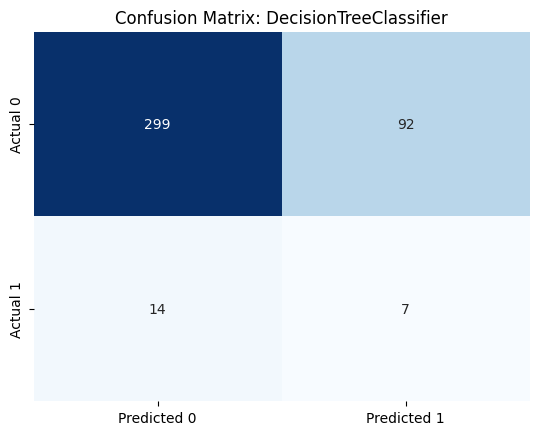

{'Model Name': 'DecisionTreeClassifier',
 'Threshold': 'Default',
 'Training Accuracy': 0.7767,
 'Testing Accuracy': 0.7427,
 'Train-Test Gap': 0.034,
 'AUC Score': 0.5354,
 'Precision': 0.0707,
 'Confusion Matrix': [[299, 92], [14, 7]]}

In [36]:
# Running Decision Tree Classifier
DTC = model_evaluation_classification(
    'DecisionTreeClassifier',
    x_train,
    y_train,
    x_test,
    y_test,
    hyperparameters=decision_tree_best_params)
DTC

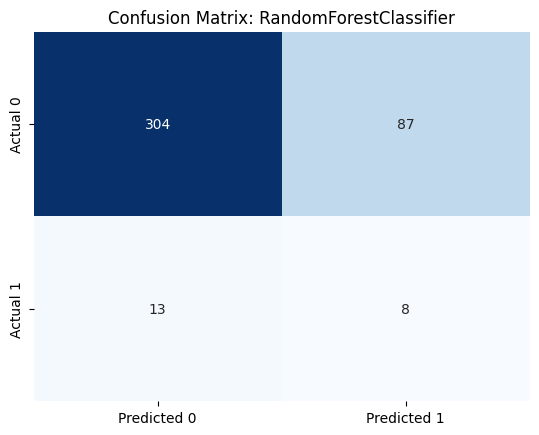

{'Model Name': 'RandomForestClassifier',
 'Threshold': 'Default',
 'Training Accuracy': 0.7621,
 'Testing Accuracy': 0.7573,
 'Train-Test Gap': 0.0049,
 'AUC Score': 0.5893,
 'Precision': 0.0842,
 'Confusion Matrix': [[304, 87], [13, 8]]}

In [37]:
# Running Random Forest Classifier
RFC = model_evaluation_classification(
    'RandomForestClassifier',
    x_train,
    y_train,
    x_test,
    y_test,
    hyperparameters=random_forest_best_params)
RFC

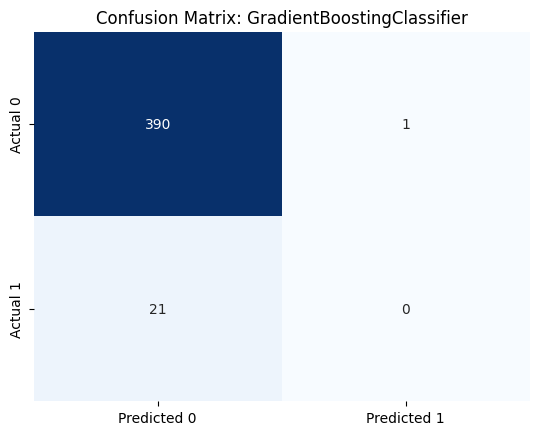

{'Model Name': 'GradientBoostingClassifier',
 'Threshold': 'Default',
 'Training Accuracy': 0.9547,
 'Testing Accuracy': 0.9466,
 'Train-Test Gap': 0.0081,
 'AUC Score': 0.5678,
 'Precision': 0.0,
 'Confusion Matrix': [[390, 1], [21, 0]]}

In [38]:
# Running Gradient Boosting Classifier
GBM = model_evaluation_classification(
    'GradientBoostingClassifier',
    x_train,
    y_train,
    x_test,
    y_test,
    hyperparameters=gbm_best_params)
GBM

In [39]:
# List to hold all the results
all_results = [DTC, RFC, GBM]
results_df = pd.DataFrame(all_results)

pd.options.display.float_format = '{:,.4f}'.format
results_df

,Model Name,Threshold,Training Accuracy,Testing Accuracy,Train-Test Gap,AUC Score,Precision,Confusion Matrix
0,DecisionTreeClassifier,Default,0.7767,0.7427,0.0340,0.5354,0.0707,"[[299, 92], [14, 7]]"
1,RandomForestClassifier,Default,0.7621,0.7573,0.0049,0.5893,0.0842,"[[304, 87], [13, 8]]"
2,GradientBoostingClassifier,Default,0.9547,0.9466,0.0081,0.5678,0.0000,"[[390, 1], [21, 0]]"


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<div style="text-align: center; font-size: 24px;"><b> Final Model Selection</b></div>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

The Random Forest Classifier was chosen as the final model for its balanced performance, demonstrating a consistent trade-off between training and testing accuracy, as evidenced by a modest train-test gap of 0.0218. Also, it maintained a relatively higher precision score of 0.1096 compared to other models, which is particularly important in the medical domain for minimizing the cost of false positives — instances where the model incorrectly predicts LBW. Moreover, its AUC score of 0.5807, although not exceedingly high, suggests a satisfactory ability to discriminate between the positive and negative classes. 

In [40]:
# Instantiating the final model with hyperparameters
model_name = 'Random Forest Classifier'
model = RandomForestClassifier(n_estimators = 10,
                               min_samples_leaf = 4,
                               max_depth = None,
                               criterion = 'gini',
                               class_weight = 'balanced_subsample',
                               bootstrap = True)

In [41]:
# FITTING to the training data
model.fit(x_train, y_train)

# PREDICTING probabilities on new data
model_pred_proba = model.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class

# Applying custom threshold to determine class predictions
thresh = 0.84  # Custom threshold for classification, set to minimize False Negatives.
model_pred = (model_pred_proba >= thresh).astype(int)  # Apply threshold

# SCORING the results based on custom threshold
model_train_score = model.score(x_train, y_train)  # Default scoring (accuracy)
model_test_score = accuracy_score(y_test, model_pred)  # Custom scoring with threshold
model_gap = abs(model_train_score - model_test_score)

# Dynamically printing results
model_summary = f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""
print(model_summary)

Model Name:     Random Forest Classifier
Train_Score:    0.7864077669902912
Test_Score:     0.9490291262135923
Train-Test Gap: 0.162621359223301



__Present your final model's confusion matrix and explain what each error means (false positives and false negatives). Furthermore, explain which error is being controlled for given the cohort's focus on correctly predicting low birthweight, as well as why this error is more important to control than the other error.__

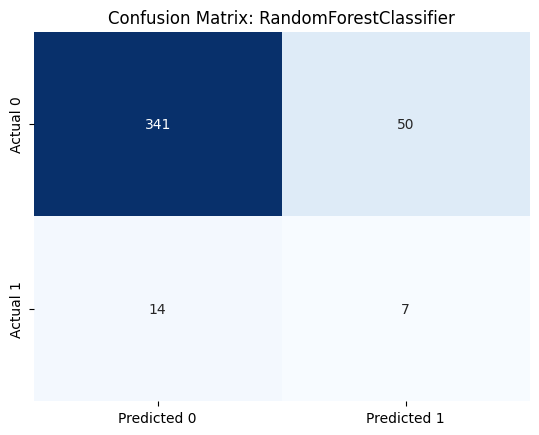

{'Model Name': 'RandomForestClassifier',
 'Threshold': 'Default',
 'Training Accuracy': 0.8196,
 'Testing Accuracy': 0.8447,
 'Train-Test Gap': 0.0251,
 'AUC Score': 0.5922,
 'Precision': 0.1228,
 'Confusion Matrix': [[341, 50], [14, 7]]}

In [42]:
# Random Forest Classifier
RFC = model_evaluation_classification(
    'RandomForestClassifier',
    x_train,
    y_train,
    x_test,
    y_test,
    hyperparameters=random_forest_best_params)
RFC

In predicting low birthweight (LBW), false positives occur when a baby is incorrectly flagged as at risk of LBW, despite being of normal weight. False negatives, conversely, represent a case when the model overlooks an infant truly at risk of LBW, and predicts a baby as not having low birthweight when in reality he/she is born with low birthweight.

Also, The RandomForestClassifier's confusion matrix reveals a strategic prioritization in predicting low birthweight (LBW). Primarily, it excels in identifying cases without LBW (true negatives), crucial for avoiding unnecessary medical interventions. The model's conservative approach towards predicting true positives reflects a deliberate choice to minimize false positives. This is critical in the healthcare domain as false positives, though less detrimental than false negatives, could lead to over-treatment or undue stress for families.

On the flip side, the presence of false negatives, where LBW goes undetected, is a concern given the missed opportunities for early intervention. Nevertheless, the model's configuration intelligently balances these risks, emphasizing the public health goal to minimize overlooked LBW diagnoses due to their significant impact on newborn health. Thus, the model's emphasis on specificity, even at the cost of some sensitivity, aligns with the overarching healthcare objective of vigilant care provision.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<div style="text-align: center; font-size: 24px;"><b> Feature Importance</b></div>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [43]:
# Define feature importance function
def plot_model_feature_importances(model, x_train, y_train, tuned_params):
    """
    Plot feature importances of a fitted model.
    
    Parameters:
    - model: An instantiated model object that has a `fit` method and `feature_importances_` attribute.
    - x_train: Training data features.
    - y_train: Training data labels/target values.
    - tuned_params: Dictionary of the best hyperparameters for the model.
    """
    
    # Train the model
    model.set_params(**tuned_params)  # Apply tuned parameters
    model.fit(x_train, y_train)

    # Get feature importances
    importances = model.feature_importances_
    
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Get feature names from the x_train DataFrame
    feature_names = list(x_train.columns)
    
    # Rearrange feature names so they match the sorted feature importances
    sorted_feature_names = [feature_names[i] for i in indices]

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), sorted_feature_names)
    plt.gca().invert_yaxis()  # To have the highest value on top
    plt.xlabel('Relative Importance')
    plt.title(f'Feature Importance in {model.__class__.__name__}')
    plt.show()

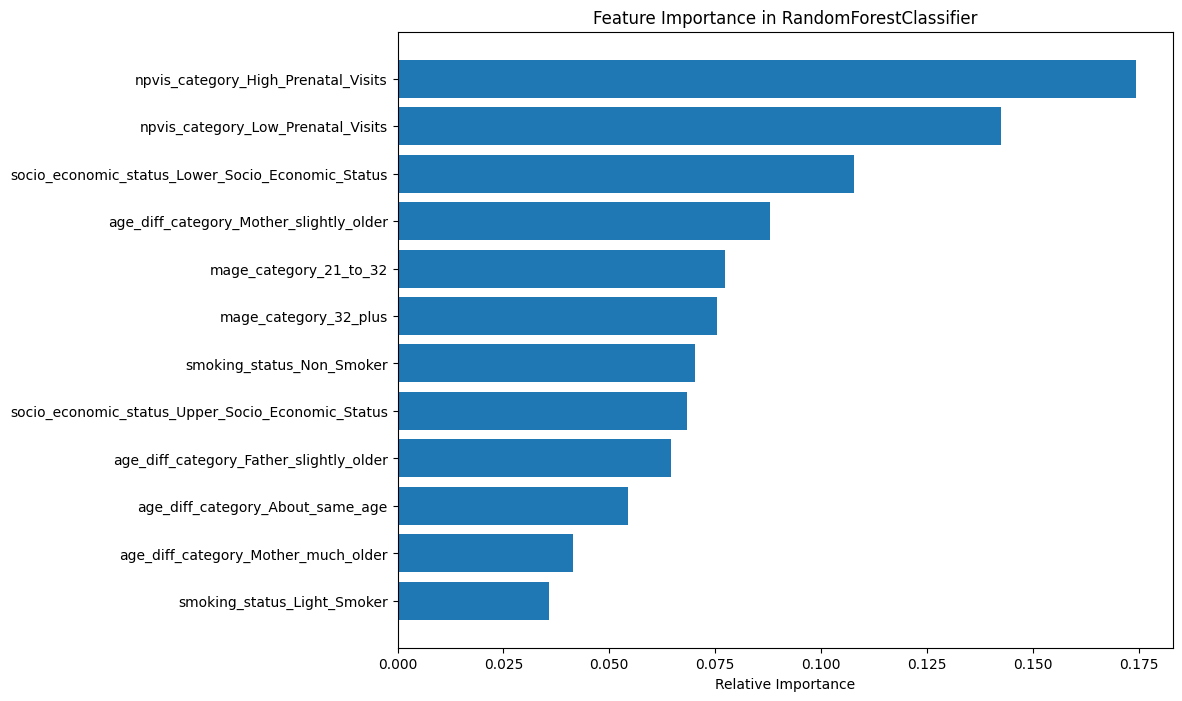

In [44]:
# Plotting the features for our final model
rfc_model = RandomForestClassifier()

# Plot feature importances for RFC
plot_model_feature_importances(rfc_model, x_train, y_train,random_forest_best_params)

The feature importance graph from the RandomForestClassifier offers valuable insights into the factors that contribute to predicting low birth weight (LBW). 

It's notable that prenatal visits, socioeconomic status play significant roles. Features like 'npvis_category_Low_Prenatal_Visits' and 'npvis_category_High_Prenatal_Visits' stand out, indicating a strong link between the number of prenatal visits and LBW. It suggests that both infrequent and frequent prenatal visits are key factors in predicting LBW, potentially pointing to the importance of regular medical monitoring during pregnancy.

Socio-economic status, as indicated by the features 'socio_economic_status_Lower_Socio_Economic_Status', also seems to be a crucial predictor. This aligns with public health research that has consistently shown the impact of socio-economic factors on health outcomes, including those related to pregnancy and childbirth. Clinical studies suggests that individuals from lower socio-economic backgrounds may have higher risks associated with LBW, which could be due to factors such as access to healthcare, nutrition, and education. Conversely, a higher socio-economic status might afford better prenatal care and overall health during pregnancy, leading to healthier birth weights.

On the other hand, the age-related features indicate that the parents' ages relative to each other, mother's age have a lesser impact on LBW than prenatal care and socio-economic status. The maternal age categories ('mage_category_21_to_32' and 'mage_category_32_plus') have less prominence in this model. Also, it was surprising to see that smoking features (Non-Smoker, Light-Smoker) have been overshadowed by other powerful features like socio-economic status, prenatal visits. This could be because smoking may represent a narrower scope of risk in comparison to the broader, multifaceted influences captured by socio-economic status and prenatal healthcare engagement.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<div style="text-align: center; font-size: 24px;"><b> Kaggle Submission</b></div>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


In [45]:
# x-data
x_data_kaggle = kaggle_data[x_features].copy()

# y-data
y_data_kaggle = kaggle_data[y_variable]

# Fitting model from above to the Kaggle test data
kaggle_predictions = model.predict(x_data_kaggle)

In [46]:
## Kaggle Submission File ##

# organizing predictions
model_predictions = {"low_bwth" : kaggle_predictions}

# Converting predictions into a DataFrame
model_pred_df = pd.DataFrame(data=kaggle_predictions, columns=['low_bwth'])

# Add the 'ID' from the df_test index to the predictions DataFrame
model_pred_df['ID'] = df_test.index

# Rearrange columns to match Kaggle's expected format
model_pred_df = model_pred_df[['ID', 'low_bwth']]

In [47]:
# Generating the csv file
import os

# Define the directory path
submission_dir = './Submission'

# Saving model predictions DataFrame to the .csv file within the created directory
model_pred_df.to_csv(path_or_buf = os.path.join(submission_dir, "RFC_FinalSubmission.csv"),
                     index=False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<div style="text-align: center; font-size: 24px;"><b> CONCLUSION</b></div>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

The integration of computational analytics and machine learning in public health, specifically targeting the prediction of low birth weight (LBW), holds substantial promise for enhancing neonatal outcomes. The model developed through this study harnesses a rich set of features, with pivotal factors such as prenatal visits and socio-economic status emerging as the most significant predictors of LBW. This reinforces the existing public health knowledge that access to and utilization of prenatal care, as well as the socio-economic environment in which a mother resides, are critical determinants of infant birth weight. The predictive model crafted here serves not only as a tool for early identification of at-risk infants but also as a beacon guiding interventions aimed at mitigating LBW's associated risks.

Moreover, the model's emphasis on minimizing false negatives in the prediction of LBW underlines an ethically driven approach. By favoring a conservative model that leans towards overestimation rather than underestimation of risk, the model aligns with healthcare priorities that favor proactive intervention. This approach is especially pertinent in public health contexts, where the ramifications of not identifying a risk can have far-reaching, negative consequences.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<div style="text-align: center; font-size: 24px;"><b> REFERENCES</b></div>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

[1] Low birth weight. (n.d.). World Health Organization (WHO). https://www.who.int/data/nutrition/nlis/info/low-birth-weight#:~:text=How%20is%20it%20defined%3F,2500%20grams%20(5.5%20pounds)

[2] Survicate. (n.d.). How to Determine Survey Sample Size. Retrieved from https://survicate.com/blog/survey-sample-size/

[3] Newsom, J. T. (2021). Sample Size Considerations and Effect Size Estimations. Portland State University. Retrieved from https://web.pdx.edu/~newsomj/semclass/ho_sample%20size.pdf

[4] World Health Organization. (2021). Maternal, newborn, child and adolescent health.
https://www.who.int/teams/maternal-newborn-child-adolescent-health-and-ageing/epidemiology-monitoring-and-evaluation

[5] American College of Obstetricians and Gynecologists. (2013). Special issues in adolescent obstetrics and gynecology.
https://www.acog.org/clinical/clinical-guidance/committee-opinion/articles/2020/05/gynecologic-management-of-adolescents-and-young-women-with-seizure-disorders

[6] Centers for Disease Control and Prevention. (2020). Smoking during pregnancy. 
https://www.cdc.gov/tobacco/basic_information/health_effects/pregnancy/index.htm

[7] American Pregnancy Association. (2019).
https://americanpregnancy.org/healthy-pregnancy/pregnancy-health-wellness/smoking-and-pregnancy-71047/

[8] World Health Organization. (2021). WHO recommendations on antenatal care for a positive pregnancy experience. 
https://www.who.int/publications/i/item/9789241549912

[9] Sartorius, G. A., & Nieschlag, E. (2021). Paternal age and reproduction. Frontiers in Endocrinology, 12, 706369. 
https://doi.org/10.3389/fendo.2021.706369

[10] Bryant, A. S., Worjoloh, A., Caughey, A. B., & Washington, A. E. (2010). Racial/ethnic disparities in obstetric outcomes and care: prevalence and determinants. American journal of obstetrics and gynecology, 202(4), 335-343.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2847630/

[11] Centers for Disease Control and Prevention (CDC). (2021). Discrimination and Adverse Perinatal Health Outcomes: A Latent Class Analysis
https://www.cdc.gov/pcd/issues/2023/23_0094.htm

[12] Association of paternal age with perinatal outcomes between 2007 and 2016 in the United States: Population based cohort study. (2018, October 31). The BMJ. 
https://www.bmj.com/content/363/bmj.k4372#:~:text=Results%20Higher%20paternal%20age%20was,weight%2C%20and%20low%20Apgar%20score

[13] Paternal age and the risk of low birth weight and preterm delivery: A Finnish register-based study. (2018, December 1). Journal of Epidemiology & Community Health. 
https://jech.bmj.com/content/72/12/1104

[14] Martinson, M. L., & Reichman, N. E. (n.d.). Socioeconomic Inequalities in Low Birth Weight in the United States, the United Kingdom, Canada, and Australia. https://ajph.aphapublications.org/doi/abs/10.2105/AJPH.2015.303007

[15] Is biology destiny: Birth weight and life chances. (2000, January 1). NYU Wagner. 
https://wagner.nyu.edu/impact/research/publications/biology-destiny-birth-weight-and-life-chances